# Cryptocurrency Analysis with Python - Buy and Hold

In this part, I am going to analyze which coin (Bitcoin, Ethereum or Litecoin) was the most profitable in last two months if we would invest using buy and hold strategy. 
We'll go through the analysis of these 3 cryptocurrencies and try to give an objective answer.
You can run this code by downloading [Jupyter notebook]({{site.url}}/assets/notebooks/2017-12-25-cryptocurrency-analysis-with-python-part2.ipynb).
    
Follow me on [twitter](https://twitter.com/romanorac) to get latest updates.

![]({{site.url}}/assets/images/bitcoin-ethereum-litecoin.png "Bitcoin, Ethereum, and Litecoin")

## Disclaimer
I am not a trader and this blog post is not a financial advice. This is purely introductory knowledge.

## Requirements

- [seaborn: statistical data visualization](https://seaborn.pydata.org/)

For other requirements, see
[previous blog post](https://romanorac.github.io/cryptocurrency/analysis/2017/12/17/cryptocurrency-analysis-with-python-part1.html)
in this series.

## Getting the data

To get the latest data, see [previous blog post]({{site.url}}/cryptocurrency/analysis/2017/12/17/cryptocurrency-analysis-with-python-part1.html),
where I described how to download it using Cryptocompare API.
You can also use the [data]({{site.url}}/assets/data/) I worked with in this example.

First, we download hourly data for BTC, ETH and LTC from Coinbase exchange.
This time we work with hourly time interval as it has higher granularity.
Cryptocompare API limits response to 2000 samples, which is 2.7 months of data for each coin.

In [7]:
import pandas as pd

def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date):
    return '%s_%s_%s_%s_%s.csv' % (from_symbol, to_symbol, exchange, datetime_interval, download_date)

def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.datetime = pd.to_datetime(df.datetime) # change type from object to datetime
    df = df.set_index('datetime') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

## Load the data

In [9]:
df_btc = read_dataset(get_filename('BTC', 'USD', 'Coinbase', 'hour', '2017-12-24'))
df_eth = read_dataset(get_filename('ETH', 'USD', 'Coinbase', 'hour', '2017-12-24'))
df_ltc = read_dataset(get_filename('LTC', 'USD', 'Coinbase', 'hour', '2017-12-24'))

Reading data from BTC_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)
Reading data from ETH_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)
Reading data from LTC_USD_Coinbase_hour_2017-12-24.csv
(2001, 6)


In [10]:
df_btc.head()

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2017-10-02 08:00:00,4435.00,4448.98,4435.01,4448.85,85.51,379813.67
2017-10-02 09:00:00,4448.84,4470.00,4448.85,4464.49,165.17,736269.53
2017-10-02 10:00:00,4450.27,4469.00,4464.49,4461.63,194.95,870013.62
2017-10-02 11:00:00,4399.00,4461.63,4461.63,4399.51,326.71,1445572.02
2017-10-02 12:00:00,4378.22,4417.91,4399.51,4383.00,549.29,2412712.73


## Extract closing prices

We are going to analyze closing prices, which are prices at which the hourly period closed. 
We merge BTC, ETH and LTC closing prices to a Dataframe to make analysis easier.

In [11]:
df = pd.DataFrame({'BTC': df_btc.close,
                   'ETH': df_eth.close,
                   'LTC': df_ltc.close})

In [12]:
df.head()

,BTC,ETH,LTC
datetime,,,
2017-10-02 08:00:00,4448.85,301.37,54.72
2017-10-02 09:00:00,4464.49,301.84,54.79
2017-10-02 10:00:00,4461.63,301.95,54.63
2017-10-02 11:00:00,4399.51,300.02,54.01
2017-10-02 12:00:00,4383.00,297.51,53.71


## Analysis

### Basic statistics

In 2.7 months, all three cryptocurrencies fluctuated a lot as you can observe in the table below. 

For each coin, we count the number of events and calculate mean, standard deviation, minimum, quartiles and maximum closing price. Quartiles divide the data into four equal groups, each group comprising a quarter of the data.

**Few interesting facts**
- The difference between the highest and the lowest BTC price was more than \$15000 in 2.7 months.
- The LTC surged from \$48.61 to \$378.66 at a certain point, which is an increase of 678.98%.

In [13]:
df.describe()

,BTC,ETH,LTC
count,2001.000000,2001.000000,2001.000000
mean,9060.256122,407.263793,106.790100
std,4404.269591,149.480416,89.142241
min,4150.020000,277.810000,48.610000
25%,5751.020000,301.510000,55.580000
50%,7319.950000,330.800000,63.550000
75%,11305.000000,464.390000,100.050000
max,19847.110000,858.900000,378.660000


### Lets dive deeper into LTC

We visualize the data in the table above with a box plot. 
A box plot shows the quartiles of the dataset with points that are determined to be outliers using a method of the [inter-quartile range](https://en.wikipedia.org/wiki/Interquartile_range) (IQR). 
`IQR = Q3 − Q1`. 
In other words, the IQR is the first quartile (25%) subtracted from the third quartile (75%).

On the box plot below, 
we see that LTC closing hourly price was most of the time between \$50 and \$100 in the last 2.7 months. 
All values over \$150 are outliers (using IQR) in our sample.

In [16]:
import seaborn as sns

ax = sns.boxplot(data=df['LTC'], orient="h")

#### Histogram of LTC closing price

Let's estimate the frequency distribution of LTC closing prices. 

**Observations**
- it shows the number of hours LTC had a certain value. For example, we can observe that LTC closing price was not over \$100 for many hours.
- it has right-skewed distribution because a natural limit prevents outcomes on one side.
- blue dotted line (median) shows that half of the closing prices were under 63.50\$.

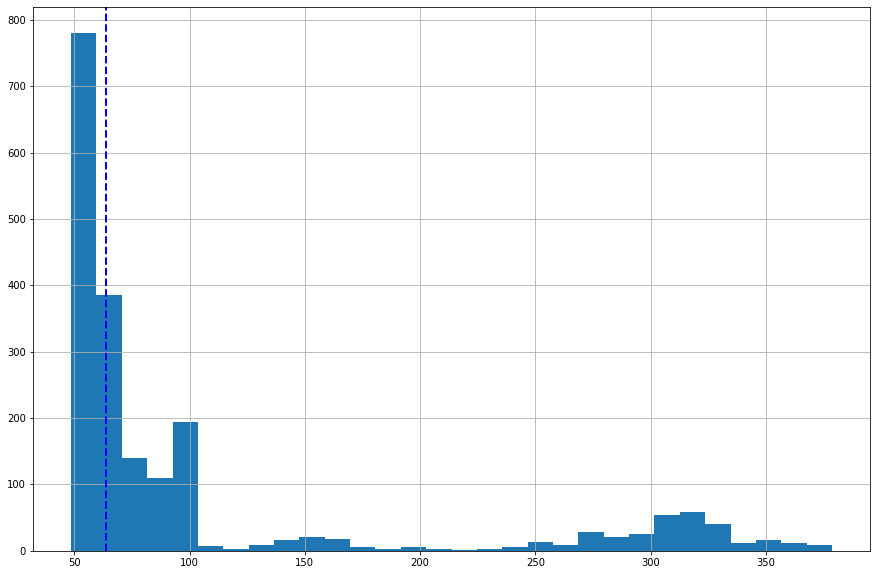

In [17]:
df['LTC'].hist(bins=30, figsize=(15,10)).axvline(df['LTC'].median(), color='b', linestyle='dashed', linewidth=2)

### Visualize absolute closing prices

The chart below shows absolute closing prices. 
It is not of much use as BTC closing prices are much higher 
then prices of ETH and LTC.

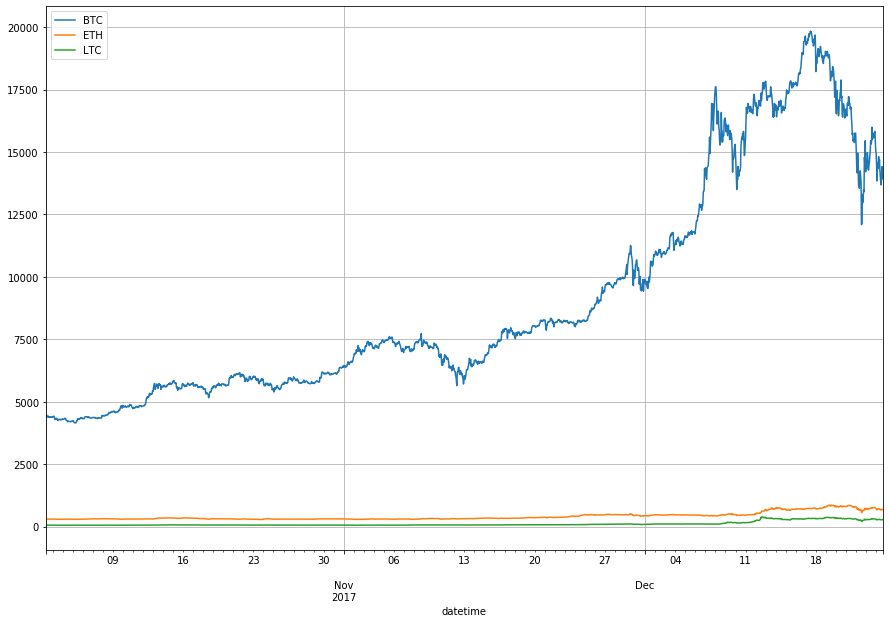

In [18]:
df.plot(grid=True, figsize=(15, 10))

### Visualize relative changes of closing prices

We are interested in a relative change of the price 
rather than in absolute price, so we use three different scales.

We see that closing prices move in tandem. When one coin closing price increases so do the other.

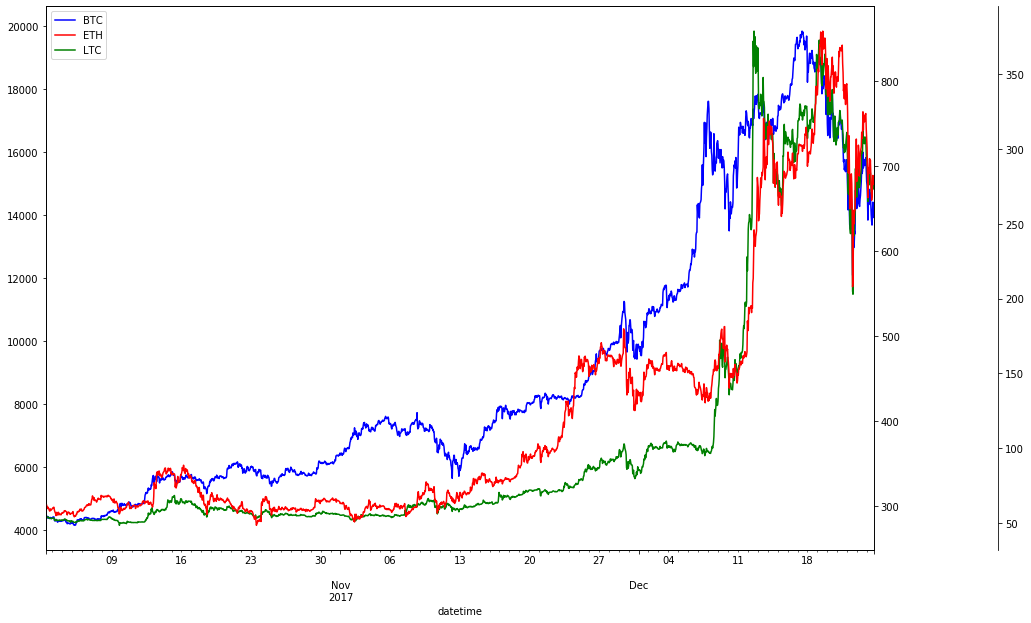

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df['BTC'].plot(ax=ax1, style='b-')
df['ETH'].plot(ax=ax1, style='r-', secondary_y=True)
df['LTC'].plot(ax=ax2, style='g-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'LTC'])

### Measure correlation of closing prices 

We calculate [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
between closing prices of BTC, ETH and LTC. 
Pearson correlation is a measure of the linear correlation between two variables X and Y. 
It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

[Sifr Data](https://www.sifrdata.com/cryptocurrency-correlation-matrix/) daily updates Pearson correlations for many cryptocurrencies.

**Observations**
- Corelation matrix is symetric so we only show the lower half. 
- BTC, ETH and LTC were highly correlated in past 2 months. This means, when BTC closing price increased, ETH and LTC followed. 
- ETH and LTC were even more correlated with 0.9565 Pearson correlation coefficient.

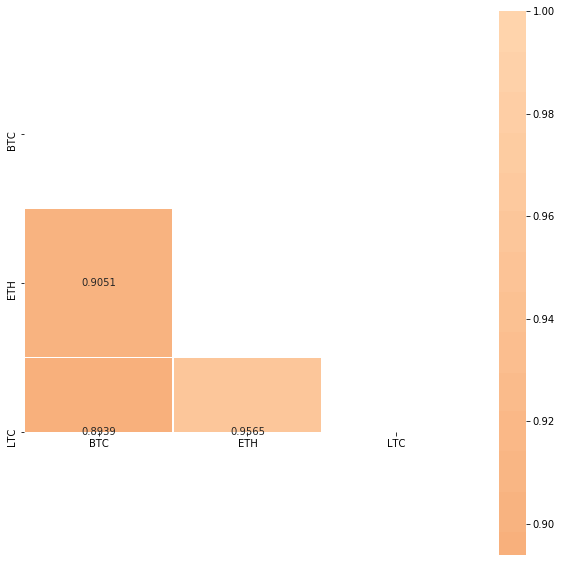

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)

## Buy and hold strategy

[Buy and hold](https://www.investopedia.com/terms/b/buyandhold.asp) is a passive investment strategy in which an investor buys a cryptocurrency and holds it for a long period of time, regardless of fluctuations in the market. 

Let's analyze returns using buy and hold strategy for past 2.7 months. 
We calculate the return percentage, where $t$ represents a certain time period and $price_0$ is initial closing price:

$$
return_{t, 0} = \frac{price_t}{price_0}
$$

In [21]:
df_return = df.apply(lambda x: x / x[0])
df_return.head()

,BTC,ETH,LTC
datetime,,,
2017-10-02 08:00:00,1.000000,1.000000,1.000000
2017-10-02 09:00:00,1.003516,1.001560,1.001279
2017-10-02 10:00:00,1.002873,1.001925,0.998355
2017-10-02 11:00:00,0.988909,0.995520,0.987025
2017-10-02 12:00:00,0.985198,0.987192,0.981542


### Visualize returns

We show that LTC was the most profitable for time period between October 2, 2017 and December 24, 2017.

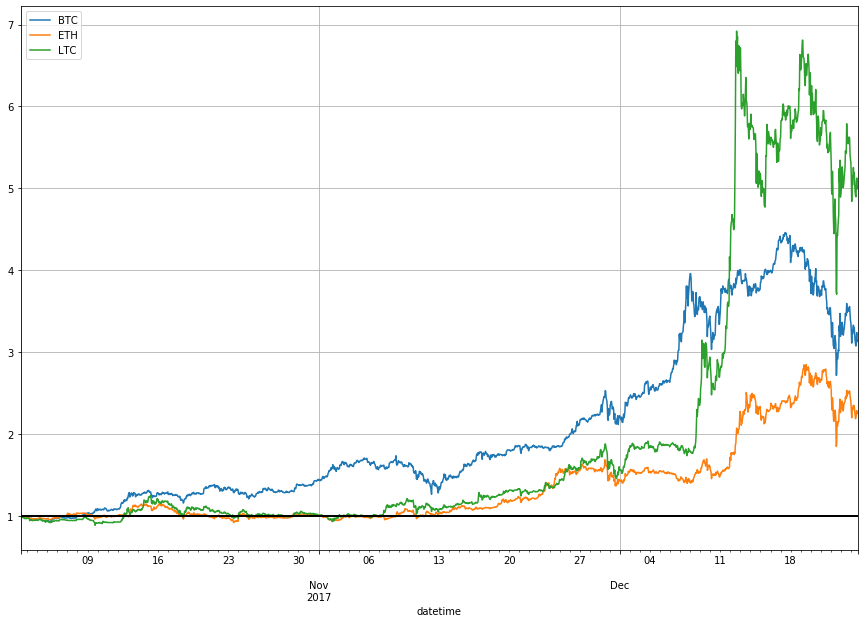

In [22]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

## Conclusion

The cryptocurrencies we analyzed fluctuated a lot but all of gained in given 2.7 months period.

### What is the percentage increase?

,BTC,ETH,LTC
datetime,,,
2017-12-24 16:00:00,314.688065,226.900488,501.407164


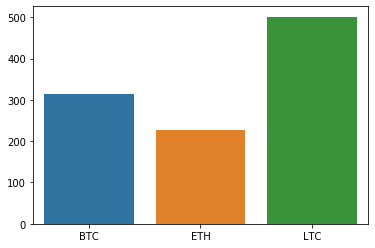

In [23]:
df_perc = df_return.tail(1) * 100
ax = sns.barplot(data=df_perc)
df_perc

### How many coins could we bought for $1000?

,BTC,ETH,LTC
datetime,,,
2017-10-02 08:00:00,0.224777,3.31818,18.274854


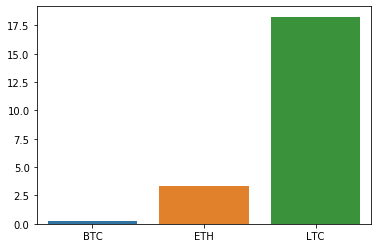

In [24]:
budget = 1000 # USD
df_coins = budget/df.head(1)

ax = sns.barplot(data=df_coins)
df_coins

### How much money would we make?

,BTC,ETH,LTC
datetime,,,
2017-12-24 16:00:00,3146.880655,2269.004878,5014.071637


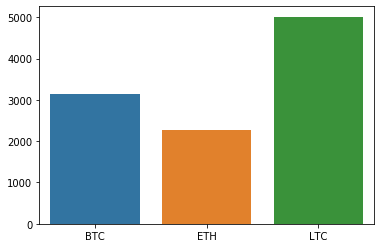

In [25]:
df_profit = df_return.tail(1) * budget

ax = sns.barplot(data=df_profit)
df_profit